In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

In [78]:
np.random.seed(1234)
os.environ['PYTHONHASHSEED'] = str(1234)
random.seed(1234)
torch.backends.cudnn.deterministic = True
torch.manual_seed(1234)

In [5]:
path = Path("/home/kkalyan/agri-split/")

In [6]:
(path/"audio_files").ls()

(#2126) [Path('/home/kkalyan/agri-split/audio_files/BK8UDCM.wav'),Path('/home/kkalyan/agri-split/audio_files/3B5A2P3.wav'),Path('/home/kkalyan/agri-split/audio_files/7QXN2WO.wav'),Path('/home/kkalyan/agri-split/audio_files/E04FSN7.wav'),Path('/home/kkalyan/agri-split/audio_files/O0L4PC1.wav'),Path('/home/kkalyan/agri-split/audio_files/0TYHMIF.wav'),Path('/home/kkalyan/agri-split/audio_files/48PTKS5.wav'),Path('/home/kkalyan/agri-split/audio_files/J28NE2C.wav'),Path('/home/kkalyan/agri-split/audio_files/3J8WKXR.wav'),Path('/home/kkalyan/agri-split/audio_files/67FIJLB.wav')...]

In [7]:
df = pd.read_csv(path/"Train.csv")
df.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [8]:
from fastaudio.augment.spectrogram import CropTime

In [9]:
ct = CropTime(duration=1000)
cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
a2s = AudioToSpec.from_cfg(cfg)

In [10]:
auds = DataBlock(blocks=(AudioBlock, CategoryBlock),  
                 get_x=ColReader("fn", pref=path), 
                 batch_tfms = [a2s],
                 item_tfms=[ResizeSignal(3000), SignalShifter(), AddNoise()],
                 get_y=ColReader("label"))

In [11]:
dbunch = auds.dataloaders(df, bs=256)

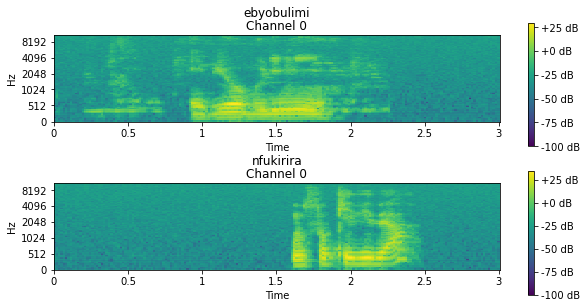

In [12]:
dbunch.show_batch(figsize=(10, 5))

In [13]:
dbunch.c

193

In [91]:
learn = cnn_learner(dbunch, 
            resnet18, 
            config=cnn_config(n_in=1),
            loss_fn=LabelSmoothingCrossEntropy,
            metrics=[accuracy]).to_fp16()

In [92]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,7.121440,8.307179,0.013575,00:04


epoch,train_loss,valid_loss,accuracy,time
0,7.354189,6.282086,0.018100,00:04
1,7.316288,6.060350,0.004525,00:04
2,7.329698,5.935530,0.013575,00:04
3,7.226011,5.788992,0.009050,00:05
4,7.091402,5.728560,0.018100,00:04
5,6.911030,5.783057,0.013575,00:04
6,6.745194,5.668165,0.018100,00:05
7,6.590421,5.606570,0.031674,00:04
8,6.456946,5.490575,0.018100,00:04
9,6.343972,5.565950,0.018100,00:04


SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.005248074419796467)

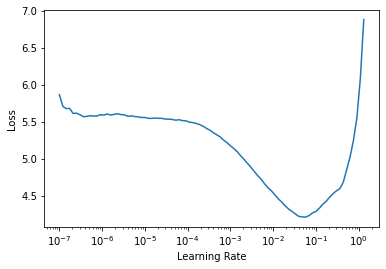

In [93]:
learn.lr_find(suggestions=True)

In [94]:
learn.fit_one_cycle(120, 1e-3, cbs=[EarlyStoppingCallback(patience=20), SaveModelCallback(fname='save-agri')])

epoch,train_loss,valid_loss,accuracy,time
0,5.497356,5.533828,0.022624,00:04
1,5.473832,5.486751,0.018100,00:04
2,5.406137,5.442891,0.031674,00:04
3,5.392397,5.483980,0.018100,00:04
4,5.346709,5.417447,0.036199,00:04
5,5.264247,5.392529,0.045249,00:05
6,5.200235,5.381564,0.040724,00:04
7,5.107863,5.371138,0.045249,00:04
8,4.994293,5.301001,0.049774,00:05
9,4.868307,5.289228,0.045249,00:04


Better model found at epoch 0 with valid_loss value: 5.533828258514404.
Better model found at epoch 1 with valid_loss value: 5.486751079559326.
Better model found at epoch 2 with valid_loss value: 5.4428911209106445.
Better model found at epoch 4 with valid_loss value: 5.417446613311768.
Better model found at epoch 5 with valid_loss value: 5.392528533935547.
Better model found at epoch 6 with valid_loss value: 5.381564140319824.
Better model found at epoch 7 with valid_loss value: 5.371137619018555.
Better model found at epoch 8 with valid_loss value: 5.301001071929932.
Better model found at epoch 9 with valid_loss value: 5.289228439331055.
Better model found at epoch 10 with valid_loss value: 5.231284141540527.
Better model found at epoch 11 with valid_loss value: 5.223479747772217.
Better model found at epoch 12 with valid_loss value: 5.212734699249268.
Better model found at epoch 13 with valid_loss value: 4.940437316894531.
Better model found at epoch 14 with valid_loss value: 4.732

In [95]:
# 6.484395	5.673533	0.004525	00:04

In [96]:
learn.load('save-agri')

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=7.585775847473997e-07)

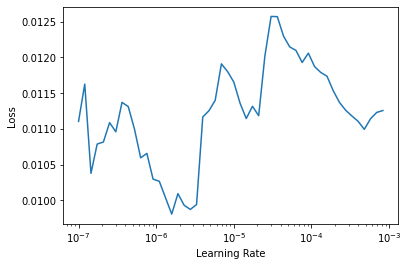

In [97]:
learn.unfreeze()
learn.lr_find(suggestions=True)

In [98]:
learn.fit_one_cycle(100, slice(1e-5, 1e-3), cbs=[EarlyStoppingCallback(patience=20), 
                                                 SaveModelCallback(fname='save-agri')])

epoch,train_loss,valid_loss,accuracy,time
0,0.012086,3.206245,0.343891,00:04
1,0.010392,3.124099,0.380091,00:04
2,0.009620,3.250661,0.334842,00:04
3,0.009940,3.093912,0.366516,00:04
4,0.010382,3.182545,0.357466,00:04
5,0.010261,3.146345,0.361991,00:04
6,0.010166,3.177365,0.330317,00:04
7,0.011050,3.146904,0.348416,00:04
8,0.011154,3.156113,0.375566,00:04
9,0.010637,3.169953,0.348416,00:04


Better model found at epoch 0 with valid_loss value: 3.2062454223632812.
Better model found at epoch 1 with valid_loss value: 3.124098539352417.
Better model found at epoch 3 with valid_loss value: 3.093912124633789.
No improvement since epoch 3: early stopping


SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=6.309573450380412e-07)

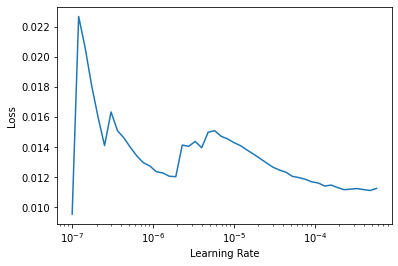

In [99]:
learn.lr_find(suggestions=True)

In [100]:
learn.load('save-agri')

In [101]:
learn.fit_one_cycle(100, slice(4e-7, 1e-5), cbs=[EarlyStoppingCallback(patience=20), 
                                                 SaveModelCallback(fname='save-agri')])

epoch,train_loss,valid_loss,accuracy,time
0,0.010492,3.129505,0.357466,00:04
1,0.010997,3.169675,0.348416,00:04
2,0.012817,3.217134,0.357466,00:04
3,0.013782,3.194234,0.339367,00:04
4,0.014431,3.271445,0.334842,00:04
5,0.013818,3.203907,0.352941,00:04
6,0.012698,3.167405,0.343891,00:04
7,0.011793,3.196048,0.334842,00:04
8,0.012484,3.184137,0.343891,00:04
9,0.012930,3.197081,0.339367,00:04


Better model found at epoch 0 with valid_loss value: 3.1295053958892822.
Better model found at epoch 10 with valid_loss value: 3.1229355335235596.
Better model found at epoch 16 with valid_loss value: 3.1083717346191406.
Better model found at epoch 29 with valid_loss value: 3.088780641555786.
No improvement since epoch 29: early stopping


SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=1.0964781722577754e-06)

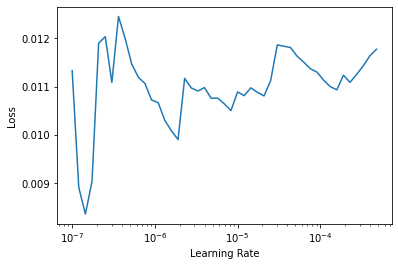

In [102]:
learn.lr_find(suggestions=True)

In [103]:
learn.load('save-agri')

In [104]:
learn.fit_one_cycle(100, slice(1e-8, 1e-6), cbs=[EarlyStoppingCallback(patience=20), 
                                                 SaveModelCallback(fname='save-agri')])

epoch,train_loss,valid_loss,accuracy,time
0,0.014752,3.137309,0.348416,00:04
1,0.011210,3.157607,0.325792,00:04
2,0.010895,3.227150,0.366516,00:04
3,0.010687,3.273873,0.330317,00:04
4,0.013136,3.173625,0.352941,00:04
5,0.012667,3.176636,0.366516,00:04
6,0.012833,3.172419,0.366516,00:04
7,0.012196,3.134309,0.357466,00:04
8,0.011800,3.154166,0.366516,00:04
9,0.012185,3.220066,0.348416,00:04


Better model found at epoch 0 with valid_loss value: 3.1373088359832764.
Better model found at epoch 7 with valid_loss value: 3.1343085765838623.
Better model found at epoch 18 with valid_loss value: 3.118001937866211.
Better model found at epoch 23 with valid_loss value: 3.0826475620269775.
No improvement since epoch 23: early stopping


In [105]:
learn.load('save-agri')

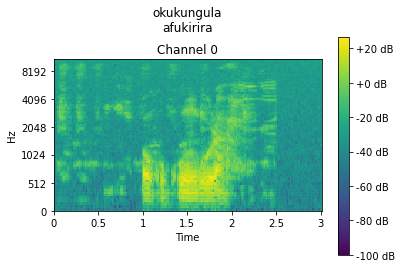

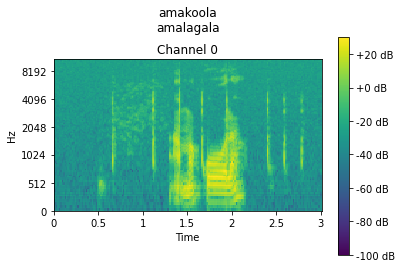

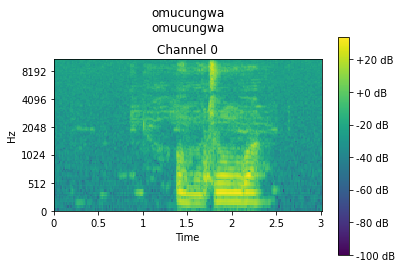

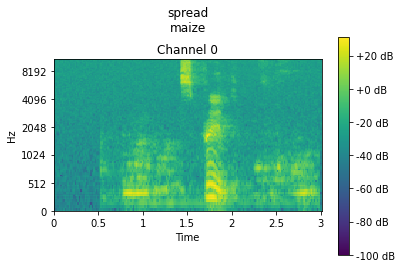

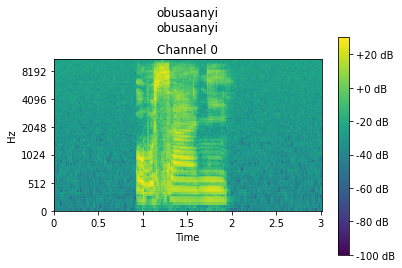

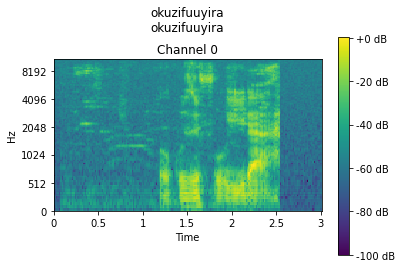

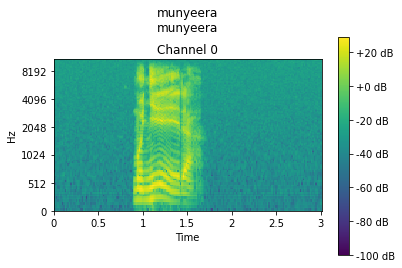

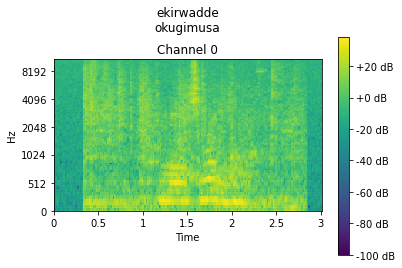

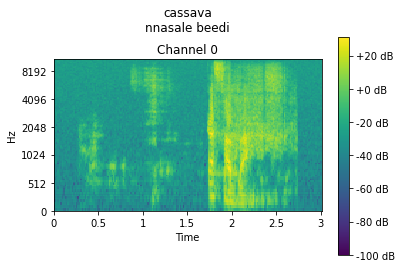

In [106]:
learn.recorder.show_results()

In [107]:
interp = ClassificationInterpretation.from_learner(learn)

In [108]:
# Find Result
# Kfold CV

In [109]:
interp.most_confused()

[('muceere', 'omuceere', 2),
 ('obuwuka', 'ekirwadde', 2),
 ('abalimi', 'mulimi', 1),
 ('agriculture', 'plantation', 1),
 ('akammwanyi', 'emmwanyi', 1),
 ('akasaanyi', 'obusaanyi', 1),
 ('akatungulu', 'amappapaali', 1),
 ('akawuka', 'obulwadde', 1),
 ('amakoola', 'amakungula', 1),
 ('amakoola', 'bibala', 1),
 ('amakungula', 'obutunda', 1),
 ('amalagala', 'ensuku', 1),
 ('amatooke', 'ebitooke', 1),
 ('amatooke', 'enkota', 1),
 ('banana', 'fertilizer', 1),
 ('bibala', 'ennima', 1),
 ('butterfly', 'fertilizer', 1),
 ('cassava', 'watermelon', 1),
 ('crop', 'agriculture', 1),
 ('ddagala', 'eddagala', 1),
 ('disease', 'leaves', 1),
 ('drought', 'akawuka', 1),
 ('drought', 'plant', 1),
 ('ebbugga', 'Pump', 1),
 ('ebbugga', 'endwadde', 1),
 ('ebigimusa', 'ebiwojjolo', 1),
 ('ebijjanjalo', 'ebijanjaalo', 1),
 ('ebikajjo', 'ebitooke', 1),
 ('ebikolo', 'ebikoola', 1),
 ('ebikoola', 'ebibala', 1),
 ('ebikoola', 'okufukirira', 1),
 ('ebimera', 'ebibala', 1),
 ('ebimera', 'endagala', 1),
 ('ebinyebw

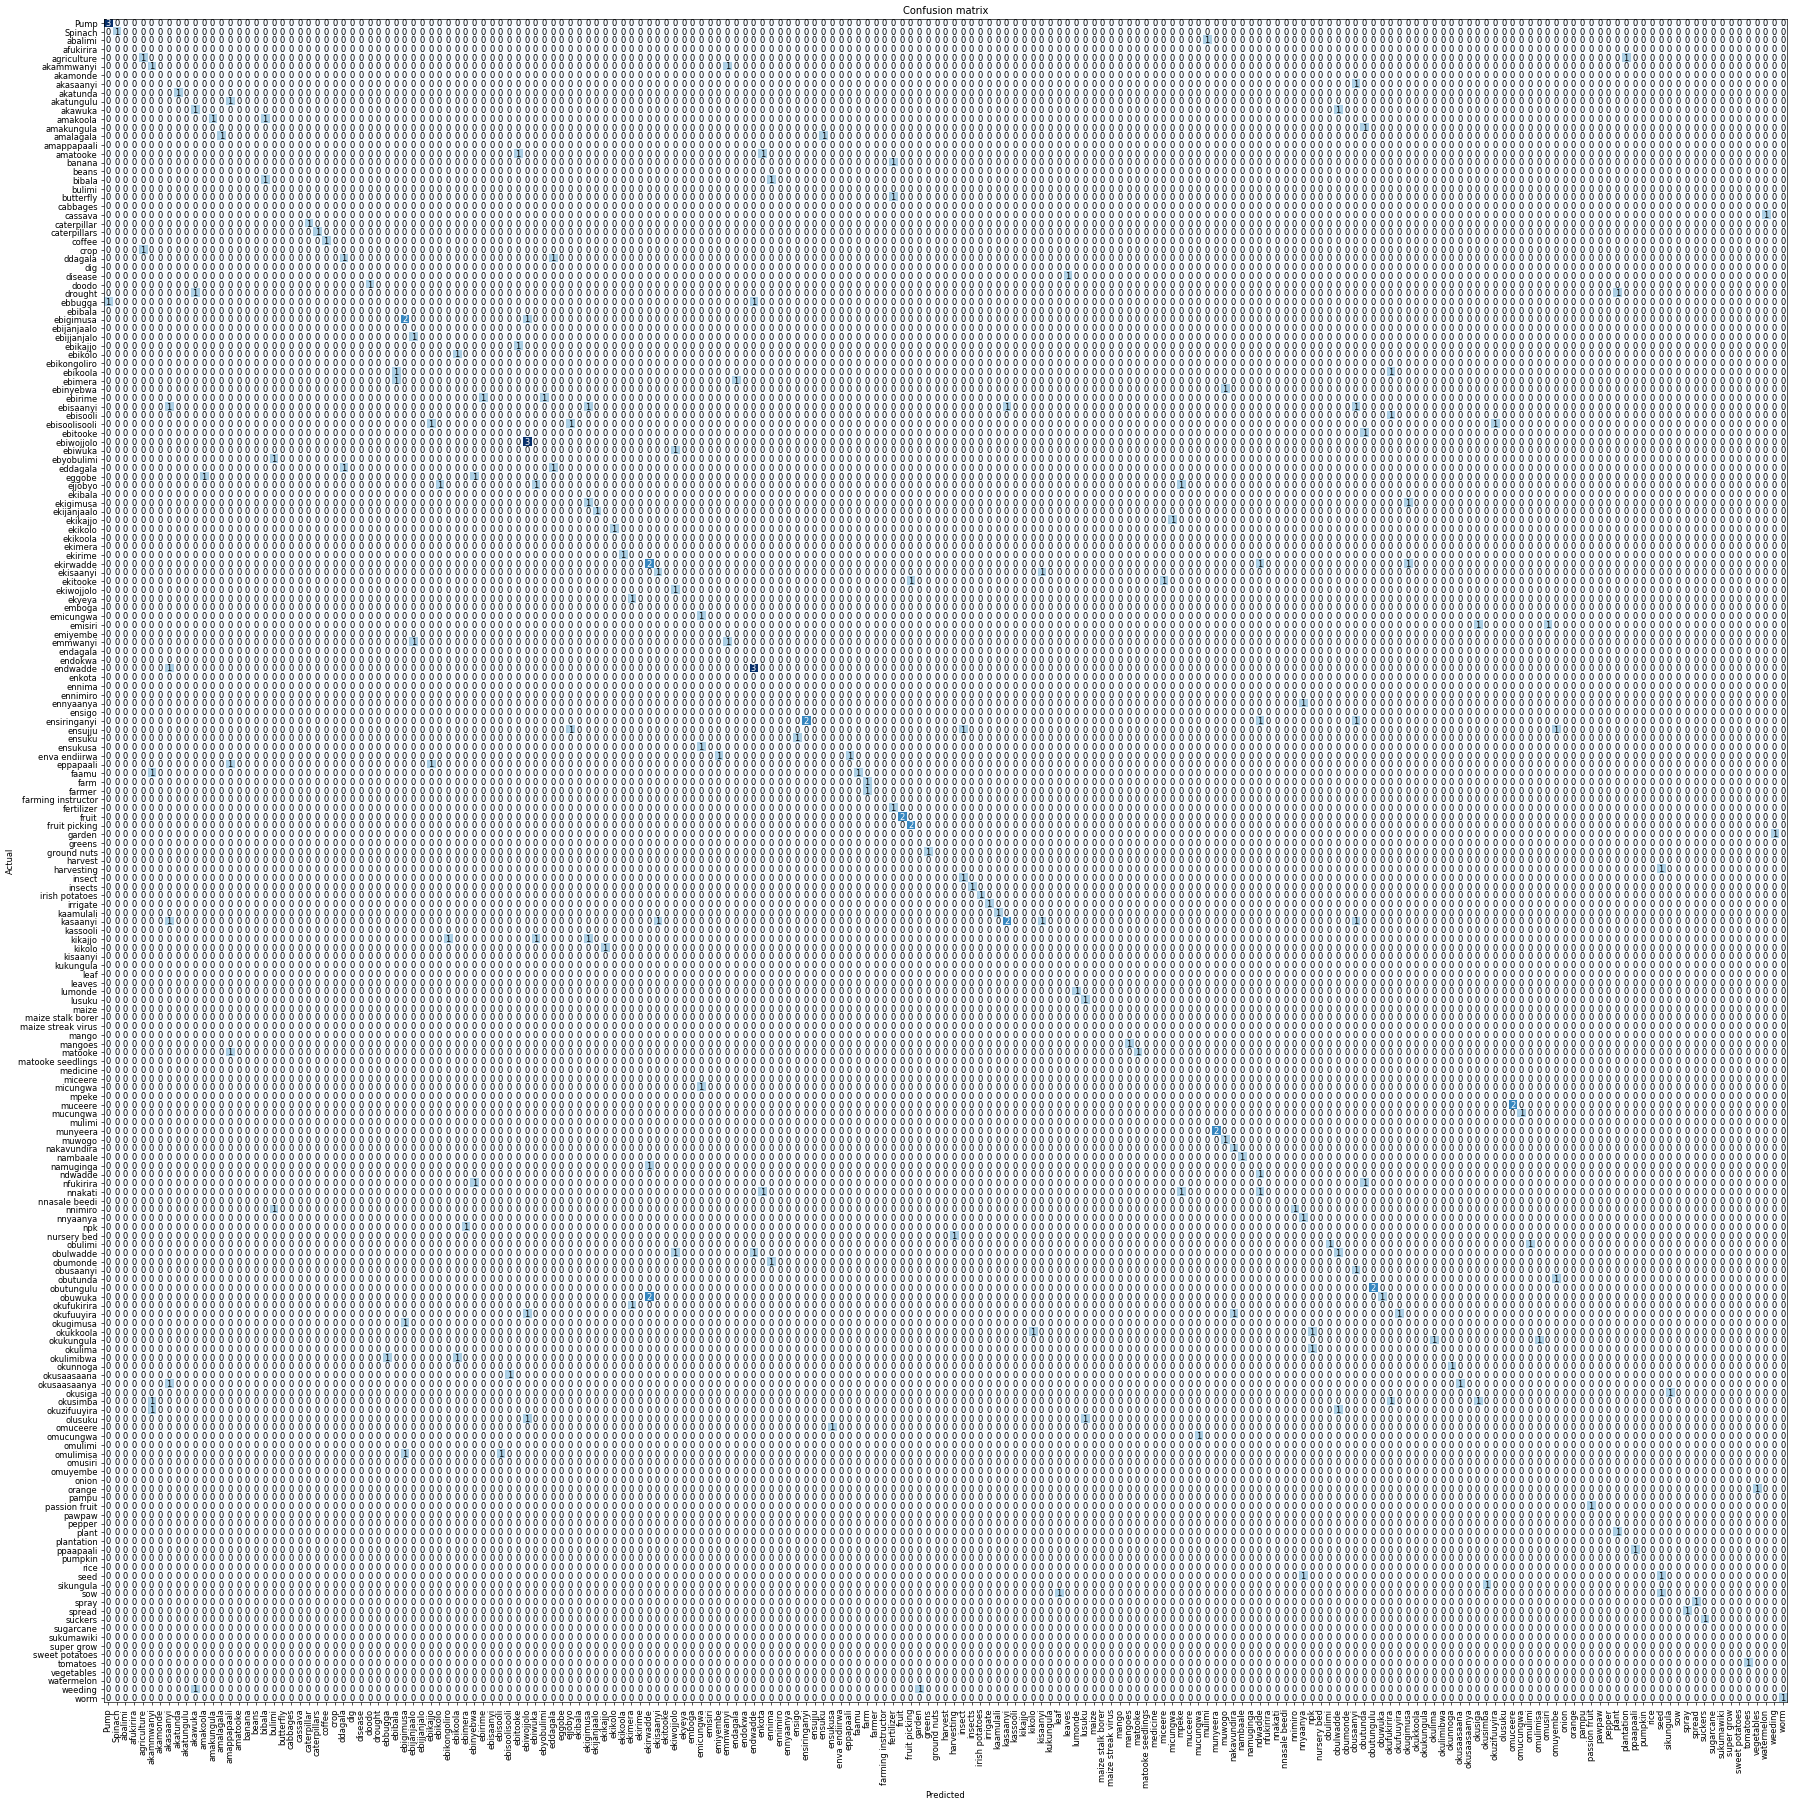

In [110]:
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [ ]:
learn.eval()

In [87]:
preds, y = learn.get_preds(dl=dbunch.valid)
acc = accuracy(preds, y)

In [88]:
acc

tensor(0.3032)

In [70]:
#dbunch.valid_ds.cat

In [90]:
ac_1 = learn.validate(); ac_1

(#2) [3.422234535217285,0.31221720576286316]

In [47]:
y.shape

torch.Size([221])

In [49]:
preds.shape

torch.Size([221, 193])

In [27]:
ss = pd.read_csv('SampleSubmission.csv')

tdl = learn.dls.test_dl(ss['fn'].values, order=True)
test_preds, test_labels = learn.get_preds(dl=tdl)

In [28]:
for i, label in enumerate(dbunch.vocab):
    ss[label] = [np.round(t[i].numpy(), 4) for t in test_preds]
ss.head()
ss.to_csv('Submission_large_bs.csv', index=False)

In [ ]:
# 3.68267962125371